In [23]:
from pymongo import MongoClient
from gridfs import GridFS
db = MongoClient().python_test
db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'python_test')

In [6]:
fs = GridFS(db)
fs

In [21]:
with open('./txt/test.txt', 'rb') as f:
    fs.put(f, filename = 'test.txt')
    print(f)

<_io.BufferedReader name='./txt/test.txt'>


In [8]:
db.fs.files.find()

In [23]:
fs_list = list(db.fs.files.find())
fs_list

[{'_id': ObjectId('62e09d5472831ae84493dd02'),
  'fliename': 'test.txt',
  'chunkSize': 261120,
  'length': 11,
  'uploadDate': datetime.datetime(2022, 7, 27, 2, 5, 8, 917000)},
 {'_id': ObjectId('62e09fb872831ae84493dd04'),
  'filename': 'test.txt',
  'chunkSize': 261120,
  'length': 11,
  'uploadDate': datetime.datetime(2022, 7, 27, 2, 15, 20, 24000)}]

In [22]:
f = fs.get_last_version(filename='test.txt')
f_decode = f.read().decode('utf-8')
f_decode

'mongodbdb\r\n'

## Image


In [6]:
from PIL import Image, ImageFilter

im = Image.open('wordcloud.png')
im.size

size = (64,64)
im.thumbnail(size)
im.save("wordcloud_resize.png")

In [5]:
im.save('wordcloud2.png')

In [22]:
from pymongo import MongoClient
import urllib.request
from io import BytesIO
from PIL import Image
from gridfs import GridFSBucket

In [15]:
db = MongoClient().python_test
db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'python_test')

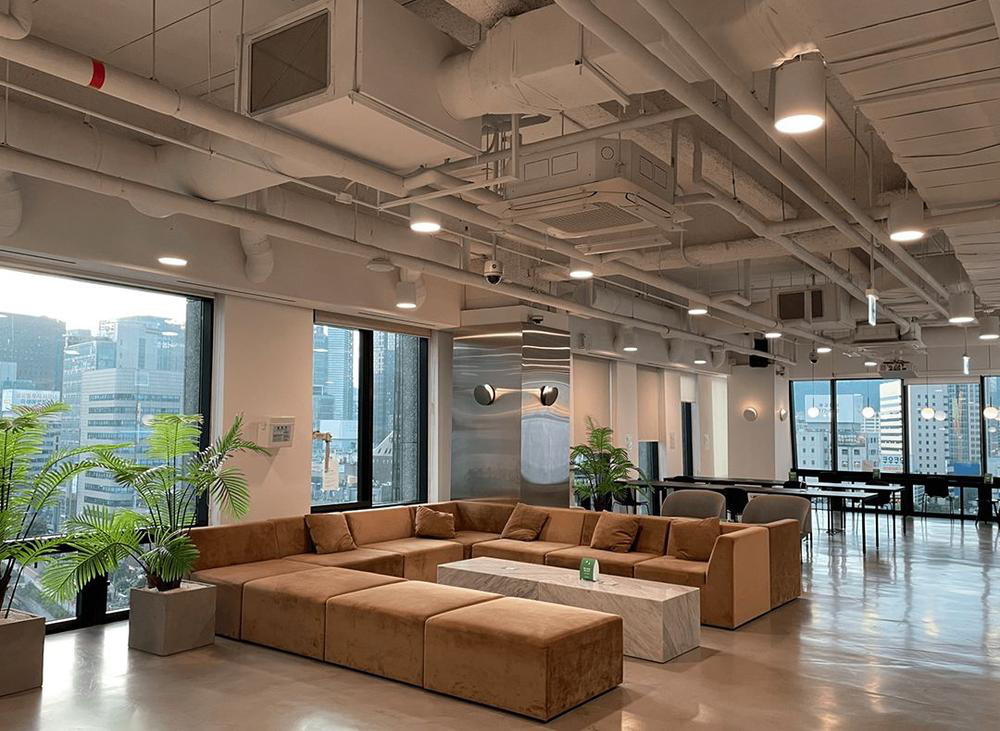

In [16]:
url = 'https://image.wanted.co.kr/optimize?src=https%3A%2F%2Fstatic.wanted.co.kr%2Fimages%2Fcompany%2F23492%2Fzps1n2aikbx6vqw5__1080_790.jpg&w=1000&q=75'
data = urllib.request.urlopen(url).read()
Image.open(BytesIO(data))

In [27]:
bucket = GridFSBucket(db)
grid_in  = bucket.open_upload_stream('result.jpg', metadata={'contentType ' : 'image/jpg'})

grid_in.write(data)
grid_in.close()

In [28]:
fs = GridFS(db)
f = fs.get_last_version(filename='result.jpg')
dataImage = f.read()
real_img = Image.open(BytesIO(dataImage))
real_img.show()